# Error maps in Appendix

In [1]:
import sys
!{sys.executable} -m pip install --user -q -q -e ../

In [2]:
from mobitic_utils.db import import_gpd_from_sql
import matplotlib.pyplot as plt
from mobitic_utils.maps import cmap

### Contours for the map background: catchment area of the most important cities and their centers

In [3]:
sql = 'select ST_UNION(aa.geometry) as geometry, aa."AAV20" as aav20, aa."LIBAAV2" as libaav20, aa."TAAV20" as taav20 from area_attraction as aa  where (aa."TAAV20"=\'4\' OR aa."TAAV20"=\'5\') GROUP BY aav20, taav20, libaav20' 
aa = import_gpd_from_sql(sql)
aa.head(2)

,geometry,aav20,libaav20,taav20
0,"POLYGON ((632044.240 2339322.818, 631139.438 2...",001,Paris,5
1,"POLYGON ((800879.298 2044730.841, 800419.373 2...",002,Lyon,4


In [4]:
sql = 'select ST_UNION(aa.geometry) as geometry, aa."AAV20" as aav20, aa."LIBAAV2" as libaav20, aa."TAAV20" as taav20 from area_attraction as aa where aa."CATEAAV"=\'11\' AND (aa."TAAV20"=\'4\' OR aa."TAAV20"=\'5\') GROUP BY aav20, taav20, libaav20'
centre = import_gpd_from_sql(sql)
centre.head(2)

,geometry,aav20,libaav20,taav20
0,"POLYGON ((609549.600 2426746.534, 609442.456 2...",001,Paris,5
1,"POLYGON ((799309.641 2086815.251, 798834.965 2...",002,Lyon,4


## Maps of differences

In [7]:
sql = 'with data as ( \
select p."0-3" as cancan, p.filosofi as filosofi, g.geometry as geometry, p."x-y" as "x-y" \
from total_population p, grille g \
where p."x-y" = g."x-y" and p.week in (12) ) \
select \
    AVG(filosofi) as filosofi, AVG(cancan) as cancan, geometry,"x-y" \
from data \
group by geometry, "x-y"'
ecart = import_gpd_from_sql(sql)
ecart.head()

,filosofi,cancan,geometry,x-y
0,47.851562,50.604338,"POLYGON ((124800.000 2432000.000, 128000.000 2...",126400.0-2430400.0
1,213.671875,150.573165,"POLYGON ((124800.000 2428800.000, 128000.000 2...",126400.0-2427200.0
2,73.095703,107.507675,"POLYGON ((121600.000 2428800.000, 124800.000 2...",123200.0-2427200.0
3,NaN,3.381500,"POLYGON ((123200.000 2432000.000, 124800.000 2...",124000.0-2431200.0
4,135.937500,110.335596,"POLYGON ((123200.000 2430400.000, 124800.000 2...",124000.0-2429600.0


In [8]:
sql = 'with data as ( \
select p."0-15" as cancan, jrc.population as jrc, g.geometry as geometry, p."x-y" as "x-y" \
from total_population p, grille g, jrc \
where p."x-y" = g."x-y" and p.week in (12) and jrc."x-y"=p."x-y" and jrc.month = \'3\' and jrc.day_night=\'D\') \
select \
    AVG(jrc) as jrc, AVG(cancan) as cancan_day, geometry, "x-y" \
from data \
group by geometry, "x-y"'
ecart_day = import_gpd_from_sql(sql)
ecart_day.head()

,jrc,cancan_day,geometry,x-y
0,35.739948,46.827869,"POLYGON ((124800.000 2432000.000, 128000.000 2...",126400.0-2430400.0
1,202.996045,145.720706,"POLYGON ((124800.000 2428800.000, 128000.000 2...",126400.0-2427200.0
2,76.971543,95.844578,"POLYGON ((121600.000 2428800.000, 124800.000 2...",123200.0-2427200.0
3,35.715870,3.405533,"POLYGON ((123200.000 2432000.000, 124800.000 2...",124000.0-2431200.0
4,65.737237,97.517290,"POLYGON ((123200.000 2430400.000, 124800.000 2...",124000.0-2429600.0


In [9]:
ecart.filosofi = ecart.filosofi.fillna(0)
ecart['ecart'] = ecart.cancan - ecart.filosofi
ecart['abs_ecart'] = (ecart.cancan - ecart.filosofi).abs()
ecart['ecart_relatif_filosofi']= (ecart.cancan - ecart.filosofi) / ecart.filosofi * 100
ecart['ecart_relatif_cancan']= (ecart.cancan - ecart.filosofi) / ecart.cancan * 100
ecart['ecart_poisson']= (ecart.cancan - ecart.filosofi) / ecart.cancan**.5
ecart_day.jrc = ecart_day.jrc.fillna(0)
ecart_day['ecart'] = ecart_day.cancan_day - ecart_day.jrc

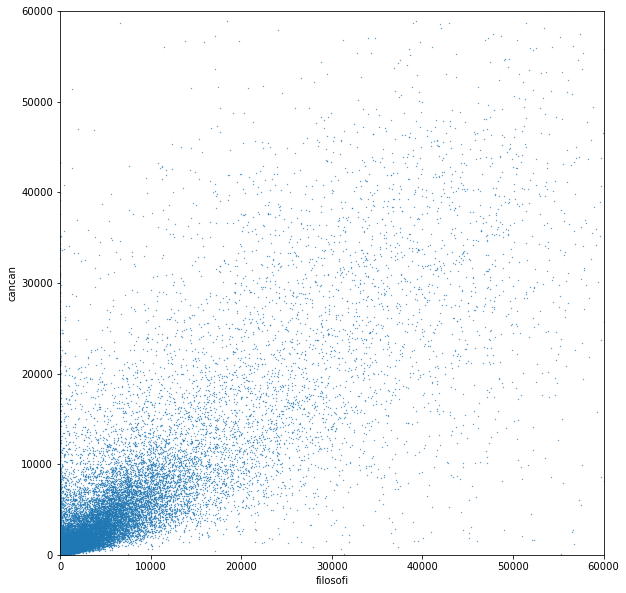

In [10]:
ax = ecart[['filosofi', 'cancan']].plot.scatter(x='filosofi', y='cancan', figsize=(10,10), s=0.1 )
ax.set_xlim((0, 60000))
ax.set_ylim((0, 60000))
plt.gca().set_aspect('equal', adjustable='box')

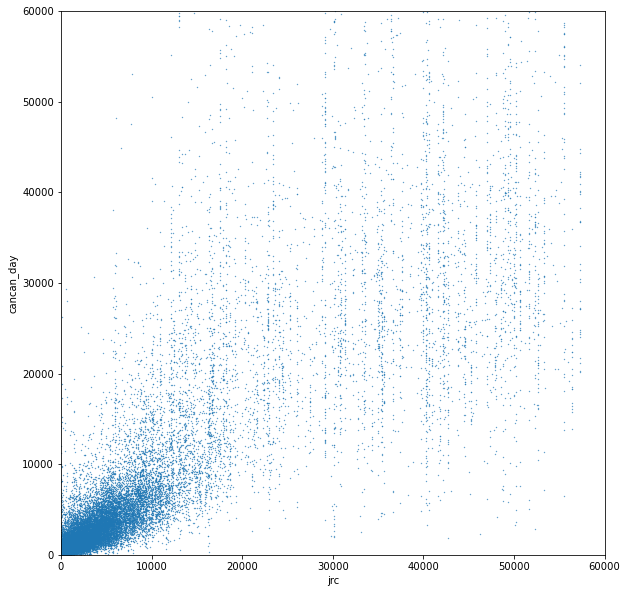

In [11]:
ax = ecart_day[['jrc', 'cancan_day']].plot.scatter(x='jrc', y='cancan_day', figsize=(10,10), s=0.1 )
ax.set_xlim((0, 60000))
ax.set_ylim((0, 60000))
plt.gca().set_aspect('equal', adjustable='box')

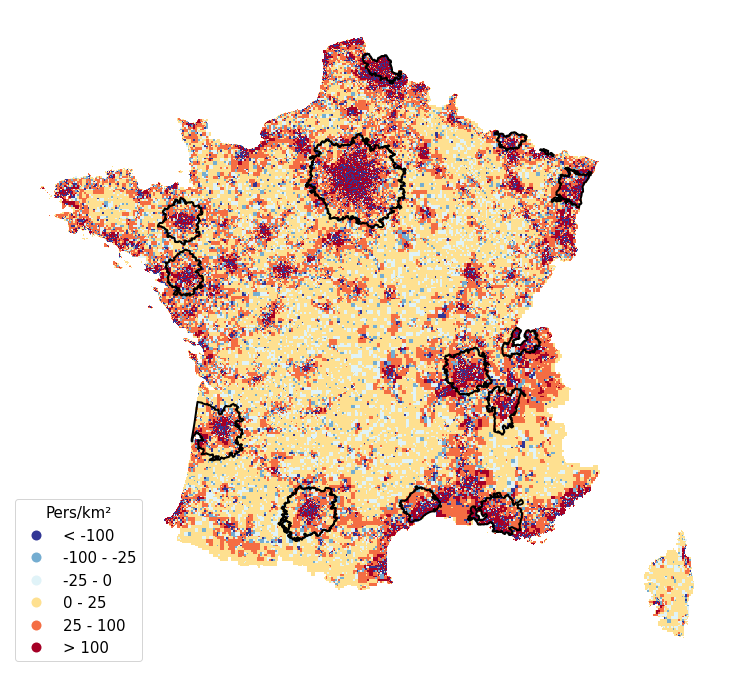

In [13]:
bins = [ -100,  -25,  0,  25,  100,  10000000000 ]
dfg_bounds = aa.to_crs("EPSG:27572")
cmap(ecart, "ecart", dfg_bounds , bins = bins, png = 'diff_filo.png')

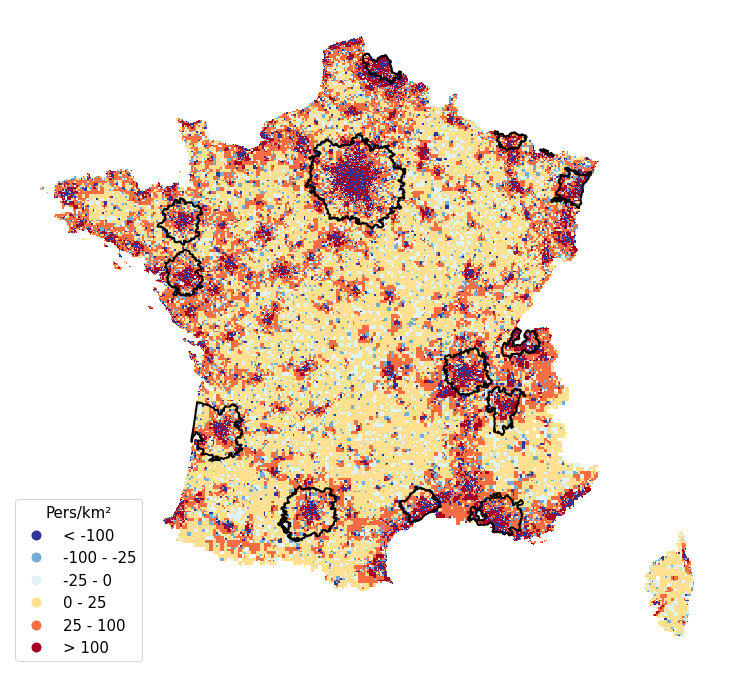

In [14]:
bins = [ -100,  -25,  0,  25,  100,  10000000000 ]
dfg_bounds = aa.to_crs("EPSG:27572")
cmap(ecart_day, "ecart", dfg_bounds , bins = bins, png = 'diff_jrc.png')

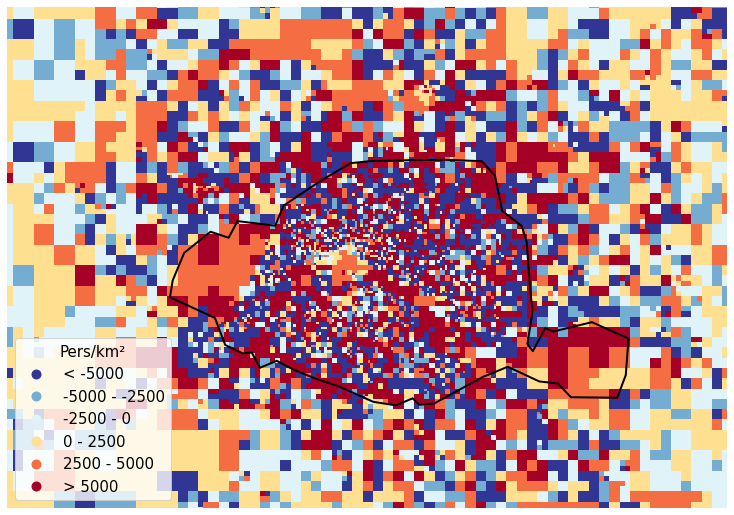

In [15]:
bins = [ -5000,  -2500,  0,  2500,  5000,  10000000000 ]
dfg_bounds = centre.to_crs("EPSG:27572").cx[585368:613390, 2420157:2439660]
cmap(ecart.cx[585368:613390, 2420157:2439660], "ecart", dfg_bounds , bins = bins, png = 'diff_filosofi_paris.png', xlim =(585368,613390), ylim = (2420157,2439660) )

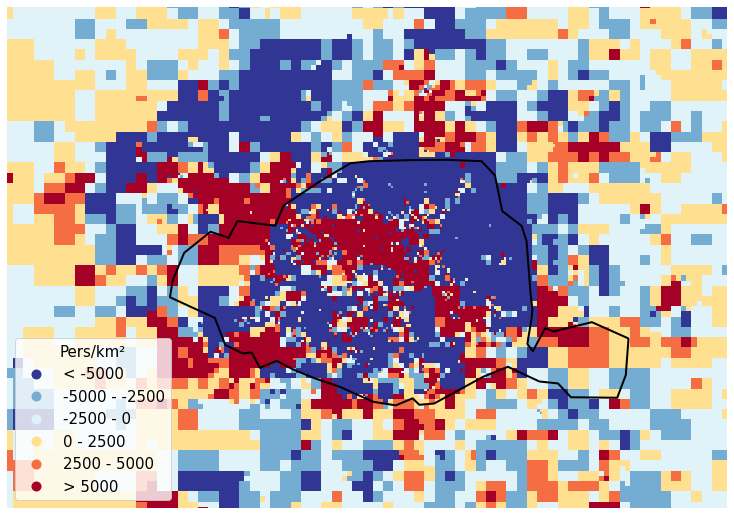

In [16]:
cmap(ecart_day.cx[585368:613390, 2420157:2439660], "ecart", dfg_bounds , bins = bins, png = 'diff_jrc_paris.png', xlim =(585368,613390), ylim = (2420157,2439660) )

In [18]:
! pip install btbpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 15.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for btbpy: filename=btbpy-0.1.0-cp39-cp39-linux_x86_64.whl size=2878186 sha256=fd1f13742068dde89788d9eeedff2839e6aded99c9aa9c8b3ecf532dacbe32dd
  Stored in directory: /home/jovyan/.cache/pip/wheels/ff/ea/4d/3a59f3115d96b7687d945680cf19d4070981de0188af62073d
Successfully built btbpy


In [19]:
import os
import btbpy
import pandas as pd
chem_data_dir = os.path.join(os.path.dirname(btbpy.__file__),'data')
chem_data_grid = os.path.join(chem_data_dir, 'fr_metro_grid1km.csv')
fr_1km = pd.read_csv(chem_data_grid)

In [20]:
ecart_2154 = ecart.to_crs("EPSG:2154")
ecart_2154['x'] = ecart_2154.centroid.x
ecart_2154['y'] = ecart_2154.centroid.y
ecart_2154.ecart = ecart_2154.ecart * ecart_2154.area / 1000000
ecart_liss = btbpy.kernelSmoothing(ecart_2154[['x','y', 'ecart']], '2154', 1000, 10000, fr_1km, verbose=False)

/home/jovyan/.local/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [21]:
ecart_day_2154 = ecart_day.to_crs("EPSG:2154")
ecart_day_2154['x'] = ecart_day_2154.centroid.x
ecart_day_2154['y'] = ecart_day_2154.centroid.y
ecart_day_2154.ecart = ecart_day_2154.ecart * ecart_day_2154.area / 1000000
ecart_day_liss = btbpy.kernelSmoothing(ecart_day_2154[['x','y', 'ecart']], '2154', 1000, 10000, fr_1km, verbose=False)

/home/jovyan/.local/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


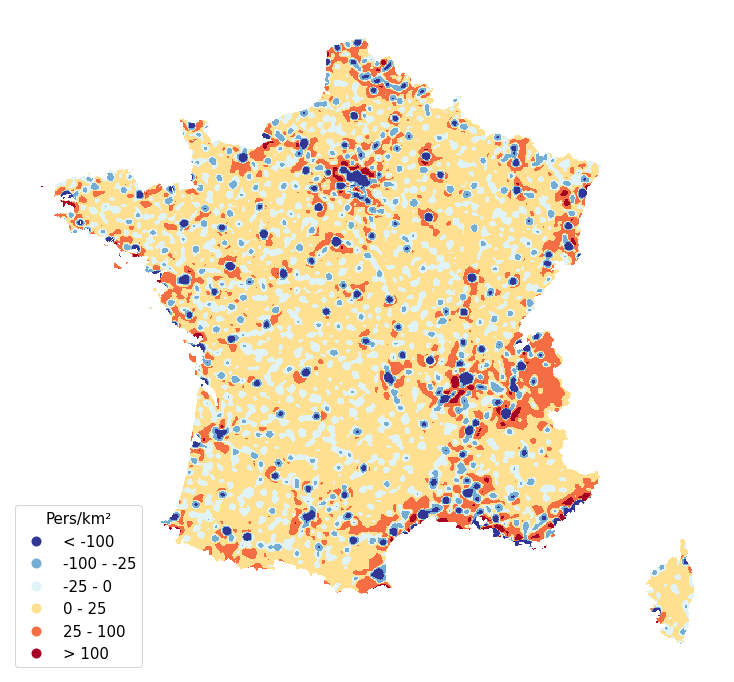

In [22]:
cmap(ecart_liss, "ecart", bins = [ -100,  -25,  0,  25,  100,  10000000000 ], png = 'diff_filosofi_liss.png')

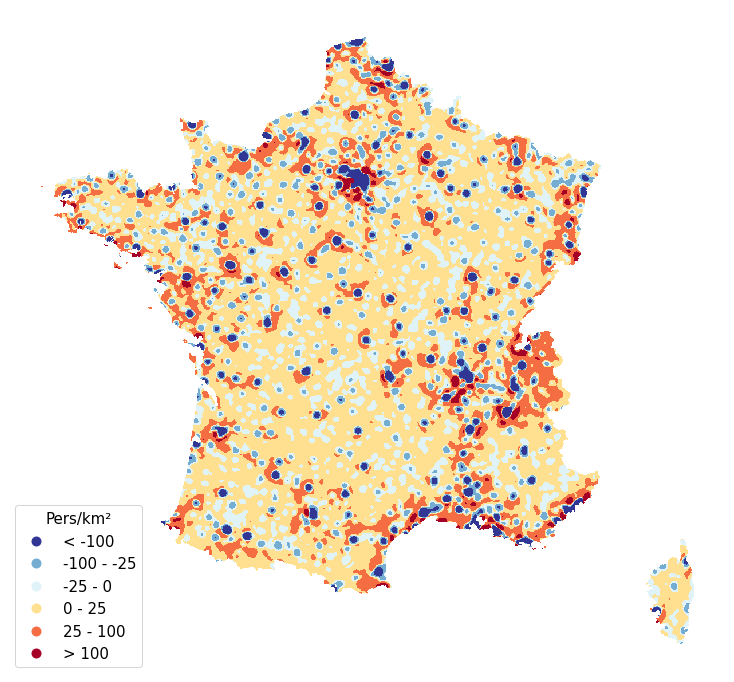

In [23]:
cmap(ecart_day_liss, "ecart", bins = [ -100,  -25,  0,  25,  100,  10000000000 ], png = 'diff_jrc_liss_day.png')